##**Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer

##**Data loading, visualization, analysis and processing**

In [ ]:
df_finlandia_08_febru_2023 = pd.read_csv("https://raw.githubusercontent.com/SGT-RIBEIRO/datasets/main/dataset_finlandia/oura%20data%20F%20with%20cycle%20phases.csv")

In [ ]:
df_finlandia_08_febru_2023

,date,cycle phases,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,07/12/2022,LP,83.0,86.0,70.0,100.0,76.0,85.0,75.0,83.0,...,2,88.0,74,100.0,96.0,97.0,88.0,72.0,79.0,100.0
1,08/12/2022,LP,84.0,89.0,93.0,100.0,76.0,77.0,72.0,67.0,...,1,86.0,77,100.0,93.0,97.0,78.0,64.0,70.0,100.0
2,10/12/2022,LP,82.0,78.0,68.0,98.0,88.0,88.0,78.0,83.0,...,0,68.0,73,94.0,90.0,98.0,67.0,48.0,72.0,68.0
3,11/12/2022,LP,83.0,74.0,79.0,100.0,99.0,91.0,78.0,82.0,...,1,81.0,75,88.0,86.0,97.0,76.0,74.0,84.0,53.0
4,12/12/2022,LP,80.0,82.0,59.0,100.0,65.0,75.0,97.0,77.0,...,0,87.0,68,87.0,95.0,98.0,75.0,82.0,88.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,05/02/2023,FP,80.0,80.0,100.0,100.0,100.0,85.0,64.0,32.0,...,0,49.0,69,71.0,77.0,68.0,54.0,1.0,39.0,100.0
59,07/02/2023,FP,88.0,86.0,84.0,100.0,100.0,83.0,70.0,100.0,...,0,79.0,90,76.0,93.0,76.0,88.0,81.0,48.0,100.0
60,09/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,08/01/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#excluding columns not relevant for the dataset

df_finlandia_08_febru_2023.drop(['date', 'Bedtime Start', 'Bedtime End'], axis=1, inplace=True)

In [ ]:
#checking for missing values

df_finlandia_08_febru_2023.isna().sum()

cycle phases                   3
Sleep Score                    3
Total Sleep Score              3
REM Sleep Score                3
Deep Sleep Score               3
Sleep Efficiency Score         3
Restfulness Score              3
Sleep Latency Score            3
Sleep Timin Score              3
Total Sleep Duration           3
Total Bedtime                  3
Awake Time                     3
REM Sleep Duration             3
Light Sleep Duration           3
Deep Sleep Duration            3
Restless Sleep                 3
Sleep Efficiency               3
Sleep Latency                  3
Sleep Timing                   3
Average Resting Heart Rate     3
Lowest Resting Heart Rate      3
Average HRV                    3
Temperature Deviation (°C)     3
Temperature Trend Deviation    3
Respiratory Rate               3
Activity Score                 0
Stay Active Score              0
Move Every Hour Score          0
Meet Daily Targets Score       0
Training Frequency Score       0
Training V

In [ ]:
#selecting only the rows that have no missing values

df_finlandia_08_febru_2023 = df_finlandia_08_febru_2023.iloc[0:60,:]

In [ ]:
#checking data types

df_finlandia_08_febru_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle phases                 60 non-null     object 
 1   Sleep Score                  60 non-null     float64
 2   Total Sleep Score            60 non-null     float64
 3   REM Sleep Score              60 non-null     float64
 4   Deep Sleep Score             60 non-null     float64
 5   Sleep Efficiency Score       60 non-null     float64
 6   Restfulness Score            60 non-null     float64
 7   Sleep Latency Score          60 non-null     float64
 8   Sleep Timin Score            60 non-null     float64
 9   Total Sleep Duration         60 non-null     float64
 10  Total Bedtime                60 non-null     float64
 11  Awake Time                   60 non-null     float64
 12  REM Sleep Duration           60 non-null     float64
 13  Light Sleep Duration  

In [ ]:
#replacing the "Nones" values with NaN to facilitate treatment

for name, value in df_finlandia_08_febru_2023.iteritems():
  for x,i in enumerate(df_finlandia_08_febru_2023[name]):
    if df_finlandia_08_febru_2023[name][x] == 'None':
      df_finlandia_08_febru_2023[name][x] = np.nan

<ipython-input-8-bba7f3fd8412>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finlandia_08_febru_2023[name][x] = np.nan


In [ ]:
X = df_finlandia_08_febru_2023.drop(['cycle phases'], axis=1)
y = df_finlandia_08_febru_2023['cycle phases']

In [ ]:
#Filling in NaN values with nearest neighbor calculation

coluns = X.columns

X_imputer = KNNImputer(n_neighbors=2)

X = X_imputer.fit_transform(X)

X = pd.DataFrame(X)

X.columns = coluns

In [ ]:
df_finlandia_08_febru_2023 = pd.concat([X,y], axis=1)

In [ ]:
df_finlandia_08_febru_2023

,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,...,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score,cycle phases
0,83.0,86.0,70.0,100.0,76.0,85.0,75.0,83.0,29130.0,35340.0,...,88.0,74.0,100.0,96.0,97.0,88.0,72.0,79.0,100.0,LP
1,84.0,89.0,93.0,100.0,76.0,77.0,72.0,67.0,30000.0,36720.0,...,86.0,77.0,100.0,93.0,97.0,78.0,64.0,70.0,100.0,LP
2,82.0,78.0,68.0,98.0,88.0,88.0,78.0,83.0,27000.0,31080.0,...,68.0,73.0,94.0,90.0,98.0,67.0,48.0,72.0,68.0,LP
3,83.0,74.0,79.0,100.0,99.0,91.0,78.0,82.0,26010.0,27720.0,...,81.0,75.0,88.0,86.0,97.0,76.0,74.0,84.0,53.0,LP
4,80.0,82.0,59.0,100.0,65.0,75.0,97.0,77.0,28170.0,36480.0,...,87.0,68.0,87.0,95.0,98.0,75.0,82.0,88.0,100.0,LP
5,88.0,94.0,91.0,100.0,65.0,84.0,94.0,76.0,31080.0,40620.0,...,91.0,89.0,90.0,85.0,98.0,99.0,91.0,89.0,100.0,LP
6,90.0,90.0,94.0,100.0,100.0,99.0,64.0,78.0,30150.0,30840.0,...,95.0,94.0,92.0,93.0,100.0,100.0,99.0,91.0,100.0,M
7,80.0,61.0,62.0,100.0,98.0,93.0,89.0,100.0,22740.0,24360.0,...,83.0,68.0,82.0,83.0,93.0,94.0,100.0,93.0,54.0,M
8,91.0,95.0,84.0,100.0,97.0,90.0,91.0,75.0,31500.0,34320.0,...,93.0,97.0,86.0,83.0,92.0,100.0,100.0,94.0,100.0,M
9,96.0,100.0,95.0,100.0,99.0,81.0,91.0,100.0,35790.0,38220.0,...,91.0,100.0,96.0,91.0,86.0,100.0,93.0,95.0,65.0,M


In [ ]:
#applying LabelEncoder on the "Cycle Phase" column to be able to measure its correlation with the other columns

laberEncoderCyclePhase = LabelEncoder()
df_finlandia_08_febru_2023['cycle phases'] = laberEncoderCyclePhase.fit_transform(df_finlandia_08_febru_2023['cycle phases'])

##**Creating a few Test Helpers**

In [ ]:
def select_columns_correlated_and_plots_scatter_plot(df):
    results = []
    for i in df:
      for x in df:
        grafic = sns.lmplot(x=i, y=x, data=df, ci=None)
        results.append(f'Variables: {i} x {x} | Ghprafic: {grafic}')
        

    return results

In [ ]:
#grafics = select_columns_correlated_and_plots_scatter_plot(df_finlandia_08_febru_2023);

In [ ]:
df_finlandia_08_febru_2023.corr()

,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,...,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score,cycle phases
Sleep Score,1.000000,0.888648,0.744716,0.580260,0.384625,0.213274,0.225882,0.505700,0.887810,0.530396,...,0.472229,0.914471,0.339960,0.014234,-0.144099,-0.032282,0.244928,0.202294,0.295070,0.302499
Total Sleep Score,0.888648,1.000000,0.803078,0.473931,0.031182,-0.002313,0.088816,0.190545,0.994902,0.812731,...,0.518649,0.812687,0.492560,0.016310,-0.079912,-0.036500,0.217436,0.237469,0.416546,0.297327
REM Sleep Score,0.744716,0.803078,1.000000,0.254835,0.078083,0.040371,-0.009453,-0.018220,0.793172,0.608738,...,0.201204,0.740104,0.260449,-0.069635,-0.160374,-0.146132,-0.030858,-0.033908,0.230209,0.097640
Deep Sleep Score,0.580260,0.473931,0.254835,1.000000,0.136929,0.049894,0.138018,0.590293,0.463269,0.331193,...,0.359769,0.326459,0.261018,0.069645,-0.156104,0.022828,0.153184,0.305819,0.482155,0.144487
Sleep Efficiency Score,0.384625,0.031182,0.078083,0.136929,1.000000,0.375674,0.104110,0.375926,0.038846,-0.540400,...,-0.077688,0.429831,-0.195437,-0.075118,-0.228778,-0.070045,-0.081141,-0.140714,-0.114360,0.122143
Restfulness Score,0.213274,-0.002313,0.040371,0.049894,0.375674,1.000000,-0.124994,0.169832,-0.010053,-0.204104,...,0.158744,0.296850,-0.041149,0.013162,-0.035665,0.203247,0.152564,0.181161,-0.019052,-0.061375
Sleep Latency Score,0.225882,0.088816,-0.009453,0.138018,0.104110,-0.124994,1.000000,0.135836,0.107550,0.026246,...,0.221815,0.142471,0.162073,0.022424,0.181092,0.044508,0.266383,0.243797,-0.046030,0.231540
Sleep Timin Score,0.505700,0.190545,-0.018220,0.590293,0.375926,0.169832,0.135836,1.000000,0.195864,-0.017662,...,0.223353,0.359438,-0.063977,0.118894,-0.115939,0.031132,0.280596,0.088234,0.023906,0.155373
Total Sleep Duration,0.887810,0.994902,0.793172,0.463269,0.038846,-0.010053,0.107550,0.195864,1.000000,0.811623,...,0.526274,0.808699,0.498297,0.027116,-0.066839,-0.018477,0.231263,0.251297,0.394939,0.309973
Total Bedtime,0.530396,0.812731,0.608738,0.331193,-0.540400,-0.204104,0.026246,-0.017662,0.811623,1.000000,...,0.496958,0.439842,0.540676,0.068462,0.077604,0.028339,0.241726,0.313634,0.398691,0.183061


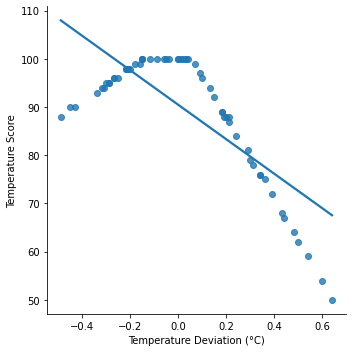

In [ ]:
sns.lmplot(x='Temperature Deviation (°C)', y='Temperature Score', data=df_finlandia_08_febru_2023, ci=None)

In [ ]:
df_finlandia_08_febru_2023['Temperature Deviation (°C)'].corr(df_finlandia_08_febru_2023['Temperature Score'])

-0.7813266511274014

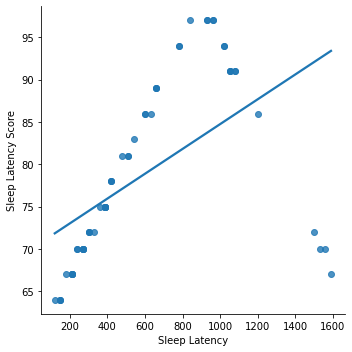

In [ ]:
sns.lmplot(x='Sleep Latency', y='Sleep Latency Score', data=df_finlandia_08_febru_2023, ci=None)

In [ ]:
df_finlandia_08_febru_2023['Sleep Latency'].corr(df_finlandia_08_febru_2023['Sleep Latency Score'])

0.5449483006187821

In [ ]:
def select_columns_correlated_between_the_required_values(df, smaller_value, higher_value):
    data_correlation  = df.corr()
    selected_columns = []
    for column in data_correlation.columns:
        for i in data_correlation.index:
            if (i != column) & (smaller_value <= data_correlation[column][i] <= higher_value):
                print(f'Column: {column} | Correlation Value: {data_correlation[column][i]}')
                selected_columns.append(column)
                break
    return df[selected_columns]

In [ ]:
def separates_the_predictor_attributes_from_the_target_and_applies_OneHot_to_the_target (df):
  list_with_the_separate_attributes = []

  X = df.iloc[:,0:df.shape[1]-1].values
  list_with_the_separate_attributes.append(X)

  y = df.iloc[:, df.shape[1]-1]
  y = pd.get_dummies(y).values
  list_with_the_separate_attributes.append(y)
  return list_with_the_separate_attributes

In [ ]:
def cross_validation (X,y):
  resultsDecisionTreeClassifier = []
  resultsRandonForestClassifier = []
  resultslogisticRegression = []
  resultsNaviBayes = []
  resultsSvm = []
  for i in range(30):
      kfold = KFold(n_splits=10, shuffle=True, random_state=i)

      tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, splitter='best')
      scoresTree = cross_val_score(tree, X, y.argmax(axis=1), cv=kfold)
      resultsDecisionTreeClassifier.append(scoresTree.mean())

      randonForest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
      scoresRandonForest = cross_val_score(randonForest, X, y.argmax(axis=1), cv=kfold)
      resultsRandonForestClassifier.append(scoresRandonForest.mean())

      logisticRegression = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
      scoresLogisticRegression = cross_val_score(logisticRegression, X, y.argmax(axis=1), cv=kfold)
      resultslogisticRegression.append(scoresLogisticRegression.mean())

      naviBayes = GaussianNB()
      scoresNaviBayes = cross_val_score(naviBayes, X, y.argmax(axis=1), cv=kfold)
      resultsNaviBayes.append(scoresNaviBayes.mean())

  #Create a dataframe with results
  results = pd.DataFrame({'DecisionTree': resultsDecisionTreeClassifier, 'RandonForest': resultsRandonForestClassifier, 'Logistic_Regression': resultslogisticRegression,
                              'Navi Bayes': resultsNaviBayes})
  
  return results.describe()

##**correlation between +0.35 and +0.60**

In [ ]:
selected_df_correlation_zero_point_thirty_five_and_zero_point_sixty = select_columns_correlated_between_the_required_values(df_finlandia_08_febru_2023, 0.35, 0.60)

Column: Sleep Score | Correlation Value: 0.5802598405274444
Column: Total Sleep Score | Correlation Value: 0.4739313172492927
Column: REM Sleep Score | Correlation Value: 0.5824756228973673
Column: Deep Sleep Score | Correlation Value: 0.5802598405274444
Column: Sleep Efficiency Score | Correlation Value: 0.3846253900814068
Column: Restfulness Score | Correlation Value: 0.3756741796966908
Column: Sleep Latency Score | Correlation Value: 0.5449483006187827
Column: Sleep Timin Score | Correlation Value: 0.5057001742540314
Column: Total Sleep Duration | Correlation Value: 0.4632692122336187
Column: Total Bedtime  | Correlation Value: 0.530396368047347
Column: Awake Time | Correlation Value: 0.3872914291493482
Column: REM Sleep Duration | Correlation Value: 0.49678870177104495
Column: Light Sleep Duration | Correlation Value: 0.5824756228973673
Column: Deep Sleep Duration | Correlation Value: 0.3922134182748575
Column: Restless Sleep | Correlation Value: 0.3872914291493482
Column: Sleep Ef

In [ ]:
list_with_the_separate_attributes = separates_the_predictor_attributes_from_the_target_and_applies_OneHot_to_the_target(selected_df_correlation_zero_point_thirty_five_and_zero_point_sixty)

In [ ]:
statistical_results_after_cross_validation_with_zero_point_thirty_five_and_zero_point_sixty = cross_validation(list_with_the_separate_attributes[0], list_with_the_separate_attributes[1])

In [ ]:
statistical_results_after_cross_validation_with_zero_point_thirty_five_and_zero_point_sixty

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.690556,0.761667,0.509444,0.685000
std,0.045419,0.025200,0.027222,0.027105
min,0.600000,0.700000,0.450000,0.616667
25%,0.666667,0.750000,0.500000,0.666667
50%,0.700000,0.766667,0.500000,0.683333
75%,0.716667,0.783333,0.533333,0.700000
max,0.766667,0.800000,0.566667,0.750000


##**correlation between -0.35 and +0.35**

In [ ]:
selected_correlation_df_less_zero_point_thirty_five_and_zero_point_thirty_five = select_columns_correlated_between_the_required_values(df_finlandia_08_febru_2023, -0.35, 0.35)

Column: Sleep Score | Correlation Value: 0.21327369614899647
Column: Total Sleep Score | Correlation Value: 0.031182369081458126
Column: REM Sleep Score | Correlation Value: 0.25483496873222294
Column: Deep Sleep Score | Correlation Value: 0.25483496873222294
Column: Sleep Efficiency Score | Correlation Value: 0.031182369081458126
Column: Restfulness Score | Correlation Value: 0.21327369614899647
Column: Sleep Latency Score | Correlation Value: 0.22588226096920502
Column: Sleep Timin Score | Correlation Value: 0.19054479050195014
Column: Total Sleep Duration | Correlation Value: 0.038846298918517375
Column: Total Bedtime  | Correlation Value: 0.3311928989750127
Column: Awake Time | Correlation Value: -0.17816864580739555
Column: REM Sleep Duration | Correlation Value: 0.23602291612319862
Column: Light Sleep Duration | Correlation Value: 0.13041875935969266
Column: Deep Sleep Duration | Correlation Value: 0.3247853738524139
Column: Restless Sleep | Correlation Value: -0.1383566291728172

In [ ]:
list_with_the_separate_attributes = separates_the_predictor_attributes_from_the_target_and_applies_OneHot_to_the_target(selected_correlation_df_less_zero_point_thirty_five_and_zero_point_thirty_five)

In [ ]:
statistical_results_after_cross_validation_with_less_zero_point_thirty_five_and_zero_point_thirty_five = cross_validation(list_with_the_separate_attributes[0], list_with_the_separate_attributes[1])

In [ ]:
statistical_results_after_cross_validation_with_less_zero_point_thirty_five_and_zero_point_thirty_five

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.688333,0.761667,0.501111,0.661667
std,0.040625,0.028416,0.040337,0.023631
min,0.600000,0.700000,0.433333,0.633333
25%,0.670833,0.750000,0.483333,0.637500
50%,0.691667,0.758333,0.500000,0.666667
75%,0.700000,0.783333,0.516667,0.683333
max,0.800000,0.816667,0.583333,0.716667


##**correlation between -0.60 and -0.35**

##**TODO:** using these required correlation values, the target column is being eliminated, because there should be no correlation between the mentioned values. Check to see if you can fix it.

In [ ]:
selected_correlation_df_less_zero_point_sixty_and_less_zero_point_thirty_five = select_columns_correlated_between_the_required_values(df_finlandia_08_febru_2023, -0.60, -0.35)

Column: Sleep Efficiency Score | Correlation Value: -0.5404000061332458
Column: Restfulness Score | Correlation Value: -0.35048126381074607
Column: Sleep Timin Score | Correlation Value: -0.4481755725341142
Column: Total Bedtime  | Correlation Value: -0.5404000061332458
Column: Deep Sleep Duration | Correlation Value: -0.46837240646455447
Column: Restless Sleep | Correlation Value: -0.3896532157894305
Column: Sleep Efficiency | Correlation Value: -0.5192239621179487
Column: Sleep Latency | Correlation Value: -0.3715540733138663
Column: Sleep Timing | Correlation Value: -0.47706276285617827
Column: Average Resting Heart Rate | Correlation Value: -0.37893908478342925
Column: Lowest Resting Heart Rate | Correlation Value: -0.38947941879635906
Column: Average HRV | Correlation Value: -0.4565742754663658
Column: Temperature Deviation (°C) | Correlation Value: -0.4565742754663658
Column: Temperature Trend Deviation | Correlation Value: -0.3973359691718493
Column: Activity Score | Correlation

In [ ]:
list_with_the_separate_attributes = separates_the_predictor_attributes_from_the_target_and_applies_OneHot_to_the_target(selected_correlation_df_less_zero_point_sixty_and_less_zero_point_thirty_five)

In [ ]:
statistical_results_after_cross_validation_less_zero_point_sixty_and_less_zero_point_thirty_five = cross_validation(list_with_the_separate_attributes[0], list_with_the_separate_attributes[1])

In [ ]:
statistical_results_after_cross_validation_less_zero_point_sixty_and_less_zero_point_thirty_five

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.020556,0.022778,0.020556,0.012222
std,0.022181,0.016657,0.010434,0.007496
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.004167,0.016667,0.004167
50%,0.016667,0.033333,0.016667,0.016667
75%,0.033333,0.033333,0.033333,0.016667
max,0.100000,0.050000,0.033333,0.016667


##**correlation between -1 and +1**

In [ ]:
#in this case it is all the correlations in the database, so just enter the original dataset

list_with_the_separate_attributes = separates_the_predictor_attributes_from_the_target_and_applies_OneHot_to_the_target(df_finlandia_08_febru_2023)

In [ ]:
statistical_results_after_cross_validation_with_less_one_and_one = cross_validation(list_with_the_separate_attributes[0], list_with_the_separate_attributes[1])

In [ ]:
statistical_results_after_cross_validation_with_less_one_and_one

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.690000,0.766111,0.501111,0.661667
std,0.038804,0.027502,0.040337,0.023631
min,0.600000,0.716667,0.433333,0.633333
25%,0.666667,0.750000,0.483333,0.637500
50%,0.700000,0.766667,0.500000,0.666667
75%,0.716667,0.783333,0.516667,0.683333
max,0.766667,0.833333,0.583333,0.716667
